In [1]:
import numpy as np
from PIL import Image, ImageDraw
from acl_model import Model
import cv2
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
with open("data/coco.names") as fd:
    coco_labels = fd.readlines()

coco_labels = [i[:-1] for i in coco_labels][1:]

In [4]:
device_id = 1
input_size = 416
model_path = "./model/yolov3_coco_tf_rgb888.om"

In [29]:
img_dict = {"path": "../acl_yolov3_caffe/data/kite.jpg", "dtype": np.uint8}

In [30]:
img_org_bgr = cv2.imread(img_dict["path"])

In [43]:
model = Model(device_id, model_path, input_size, input_size)

[ACL] init resource stage:
[ACL] init resource stage success
[Model] class Model init resource stage:
[Model] create model output dataset:
[Model] create model output dataset success
model input size 1
input  0
model input dims ({'name': 'input/input_data', 'dimCount': 4, 'dims': [1, 416, 416, 3]}, 0)
model input datatype 4
model output size 3
output  0
model output dims ({'name': 'pred_sbbox/concat_2:0', 'dimCount': 5, 'dims': [1, 52, 52, 3, 85]}, 0)
model output datatype 0
output  1
model output dims ({'name': 'pred_mbbox/concat_2:0', 'dimCount': 5, 'dims': [1, 26, 26, 3, 85]}, 0)
model output datatype 0
output  2
model output dims ({'name': 'pred_lbbox/concat_2:0', 'dimCount': 5, 'dims': [1, 13, 13, 3, 85]}, 0)
model output datatype 0
[Model] class Model init resource stage success


In [44]:
# %timeit -n 50 -r 10 
bboxes = model.run(img_org_bgr)

98380096
img_buf_size 519168
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success


In [45]:
img = Image.open(img_dict["path"])

In [46]:
img1 = ImageDraw.Draw(img)
for bbox in bboxes:
    img1.rectangle(list(bbox[:4]), outline ="red", width=2)
    print(bbox[:4], bbox[4], bbox[5], coco_labels[int(bbox[5])])

[117.29198456 613.921875   166.67675781 762.203125  ] 0.990234375 0.0 person
[ 83.3828125  513.50195312 107.65624237 565.24804688] 0.9892673492431641 0.0 person
[210.23435974 690.703125   273.609375   862.546875  ] 0.9765625 0.0 person
[349.1496582  488.46044922 358.1315918  506.60205078] 0.9658527374267578 0.0 person
[522.71679688 506.37988281 540.84570312 532.55761719] 0.9455986022949219 0.0 person
[ 27.682127   518.89746094  49.25146484 558.22753906] 0.9417600631713867 0.0 person
[178.71826172 547.25878906 193.20361328 572.11621094] 0.8084335327148438 0.0 person
[541.49316406 516.43457031 557.81933594 534.69042969] 0.4351015090942383 0.0 person
[595.00390625  84.83203125 670.87109375 155.82421875] 0.9776535034179688 33.0 kite
[280.33789062 237.21386719 306.69335938 286.59863281] 0.887664794921875 33.0 kite
[307.86132812 380.14404297 326.29492188 397.98095703] 0.8291068077087402 33.0 kite
[470.61520386 341.72167969 486.50973511 361.65332031] 0.7977380752563477 33.0 kite
[577.28759766

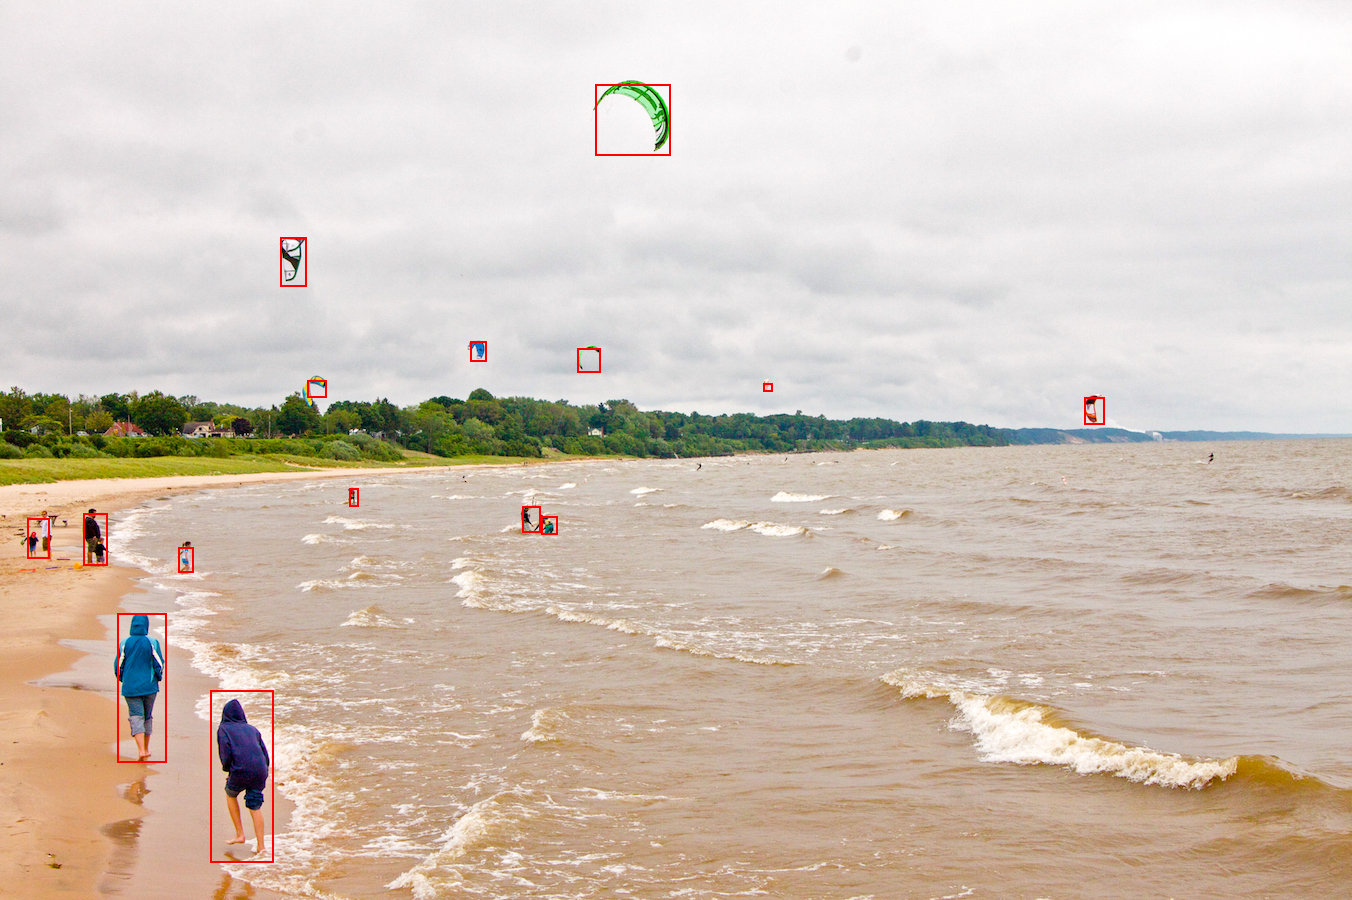

In [48]:
img